In [ ]:
# See Readme.md for write up!

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_csv = "data/city_data.csv"
ride_data_csv = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_csv)
ride_data_df = pd.read_csv(ride_data_csv)

# check dfs (and see what column to join on)
# print(city_data_df.head())
# print(ride_data_df.head())

# Combine the data into a single dataset
# played with with indeces to match up example
combine_data_df = ride_data_df.reset_index().merge(city_data_df,on='city',how='outer')
combine_data_df = combine_data_df.set_index('index').sort_index().reset_index(drop=True)

# # Display the data table for preview
# combine_data_df.head(10)
combine_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

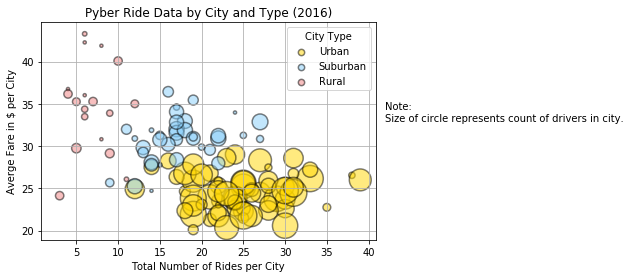

In [2]:
# Obtain the x and y coordinates for each of the three city types

# get unique values for type
#combine_data_df["type"].unique()

# create a grouped by city dataframe for each city type to use as base
group_combine_urban = combine_data_df.loc[combine_data_df["type"]=='Urban'].groupby("city")
group_combine_sub = combine_data_df.loc[combine_data_df["type"]=='Suburban'].groupby("city")
group_combine_rural = combine_data_df.loc[combine_data_df["type"]=='Rural'].groupby("city")

# set x to count of rides
x_urban = group_combine_urban["ride_id"].count()
x_sub = group_combine_sub["ride_id"].count()
x_rural = group_combine_rural["ride_id"].count()

# set y to mean of fare
y_urban = group_combine_urban["fare"].mean()
y_sub = group_combine_sub["fare"].mean()
y_rural = group_combine_rural["fare"].mean()

#create sizes
s_urban = group_combine_urban["driver_count"].max()*10
s_sub = group_combine_sub["driver_count"].max()*10
s_rural = group_combine_rural["driver_count"].max()*10

# Build the scatter plots for each city types
plt.scatter(x_urban,y_urban,color='gold',edgecolor='black',alpha=.5,s=s_urban,label='Urban',linewidth=1.5)
plt.scatter(x_sub,y_sub,color='lightskyblue',edgecolor='black',alpha=.5,s=s_sub,label='Suburban',linewidth=1.5)
plt.scatter(x_rural,y_rural,color='lightcoral',edgecolor='black',alpha=.5,s=s_rural,label='Rural',linewidth=1.5)

# Incorporate the other graph properties
plt.title("Pyber Ride Data by City and Type (2016)")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Averge Fare in $ per City")
plt.grid()

# Create a legend and legend label
legend = plt.legend(title = "City Type")

# fix point sizes
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

# Incorporate a text label regarding circle size
plt.text(42,33,"Note:\nSize of circle represents count of drivers in city.")

# Save Figure
plt.savefig("Pyber Ride Data.png",bbox_inches='tight')

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

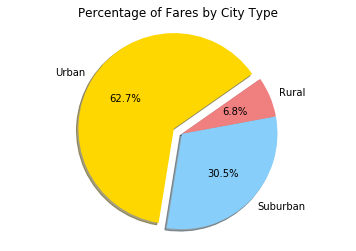

In [4]:
# Calculate Type Percents

# get fares by type to build list
urban_fare = combine_data_df["fare"].loc[combine_data_df["type"]=="Urban"].sum()
sub_fare = combine_data_df["fare"].loc[combine_data_df["type"]=="Suburban"].sum()
rural_fare = combine_data_df["fare"].loc[combine_data_df["type"]=="Rural"].sum()

labels = ["Urban","Suburban","Rural"]
x = [urban_fare,sub_fare,rural_fare]
colors = ["gold","lightskyblue","lightcoral"]
explode = [0.10,0,0]

# Build Pie Chart
plt.pie(x,labels=labels,colors=colors,explode=explode,startangle=35,shadow=True
       ,autopct='%1.1f%%')
plt.title("Percentage of Fares by City Type")
plt.axis("equal")
#plt.show()
# Save Figure
plt.savefig('Percentage of Fares by City Type.png')

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

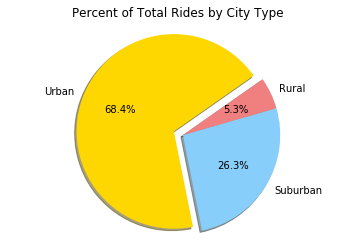

In [6]:
# Calculate Ride Percents

# get total rides by type
urban_ride = combine_data_df["ride_id"].loc[combine_data_df["type"]=="Urban"].count()
sub_ride = combine_data_df["ride_id"].loc[combine_data_df["type"]=="Suburban"].count()
rural_ride = combine_data_df["ride_id"].loc[combine_data_df["type"]=="Rural"].count()

#use labels,colors, and explode from prior
x_rides = [urban_ride,sub_ride,rural_ride]

# Build Pie Chart
plt.pie(x_rides,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',startangle=35,shadow=True)
plt.axis("equal")
plt.title("Percent of Total Rides by City Type")
# plt.show()
# Save Figure
plt.savefig('Percent of Rides by City Type.png')


In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

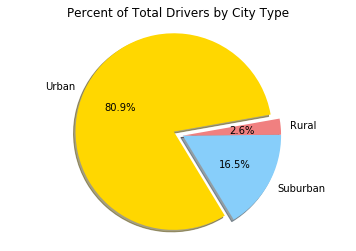

In [8]:
# Calculate Driver Percents

#get type/city/driver columns (could use city data, but want to trim the combined data and will drop dups)
city_type_drivers_df = combine_data_df[["city","type","driver_count"]]
#city_type_drivers_df.count()

# drop duplicates
drivers_df = city_type_drivers_df.drop_duplicates()
#drivers_df.count()

# get x values for chart
urban_driver = drivers_df["driver_count"].loc[drivers_df["type"]=="Urban"].sum()
sub_driver = drivers_df["driver_count"].loc[drivers_df["type"]=="Suburban"].sum()
rural_driver = drivers_df["driver_count"].loc[drivers_df["type"]=="Rural"].sum()

#use labels,colors, and explode from prior
x_driver = [urban_driver,sub_driver,rural_driver]

# Build Pie Chart
plt.pie(x_driver,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',startangle=10,shadow=True)
plt.axis("equal")
plt.title("Percent of Total Drivers by City Type")
# plt.show()

# Save Figure
plt.savefig('Percent of Drivers by City Type.png')


In [9]:
# Show Figure
plt.show()